## Dataset Information

   Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

   Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


### Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

## Loading the dataset

In [2]:
df = pd.read_csv(r"D:\Datasets\Machine-Learning-Projects\Bike Sharing Demand Analysis - Regression\hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# statistical info
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
# unique values
df.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

## Preprocessing the dataset

In [6]:
# check for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df = df.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})
df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
df = df.drop(columns=['instant', 'dteday', 'year'])

In [9]:
# change int columns to category
cols = ['season','month','hour','holiday','weekday','workingday','weather']

for col in cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hour        17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


## Exploratory Data Analysis

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

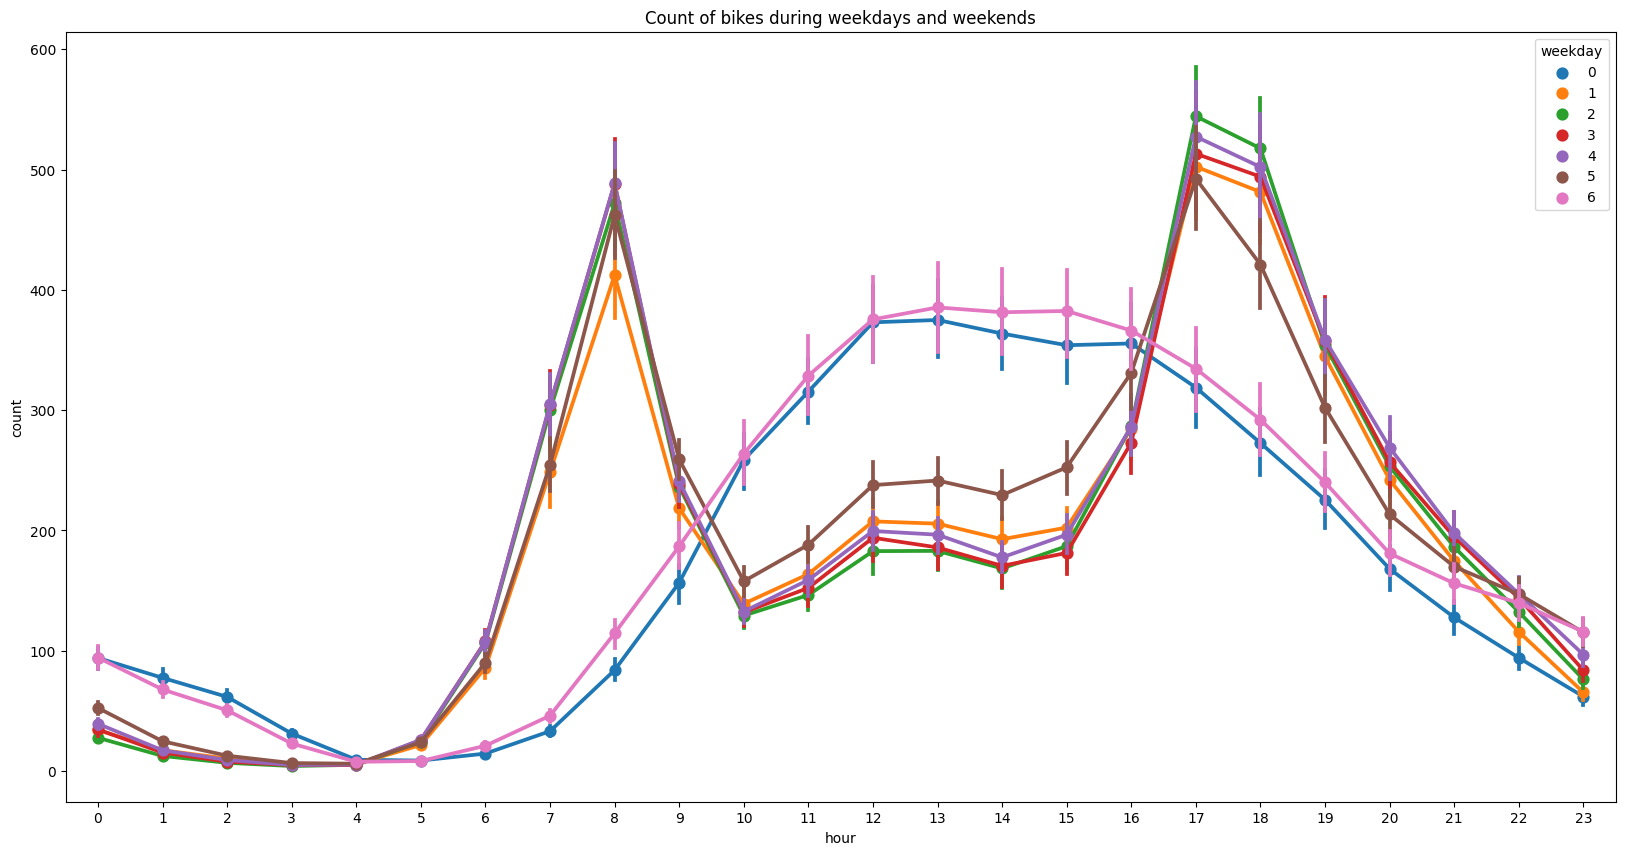

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Unregistered users')]

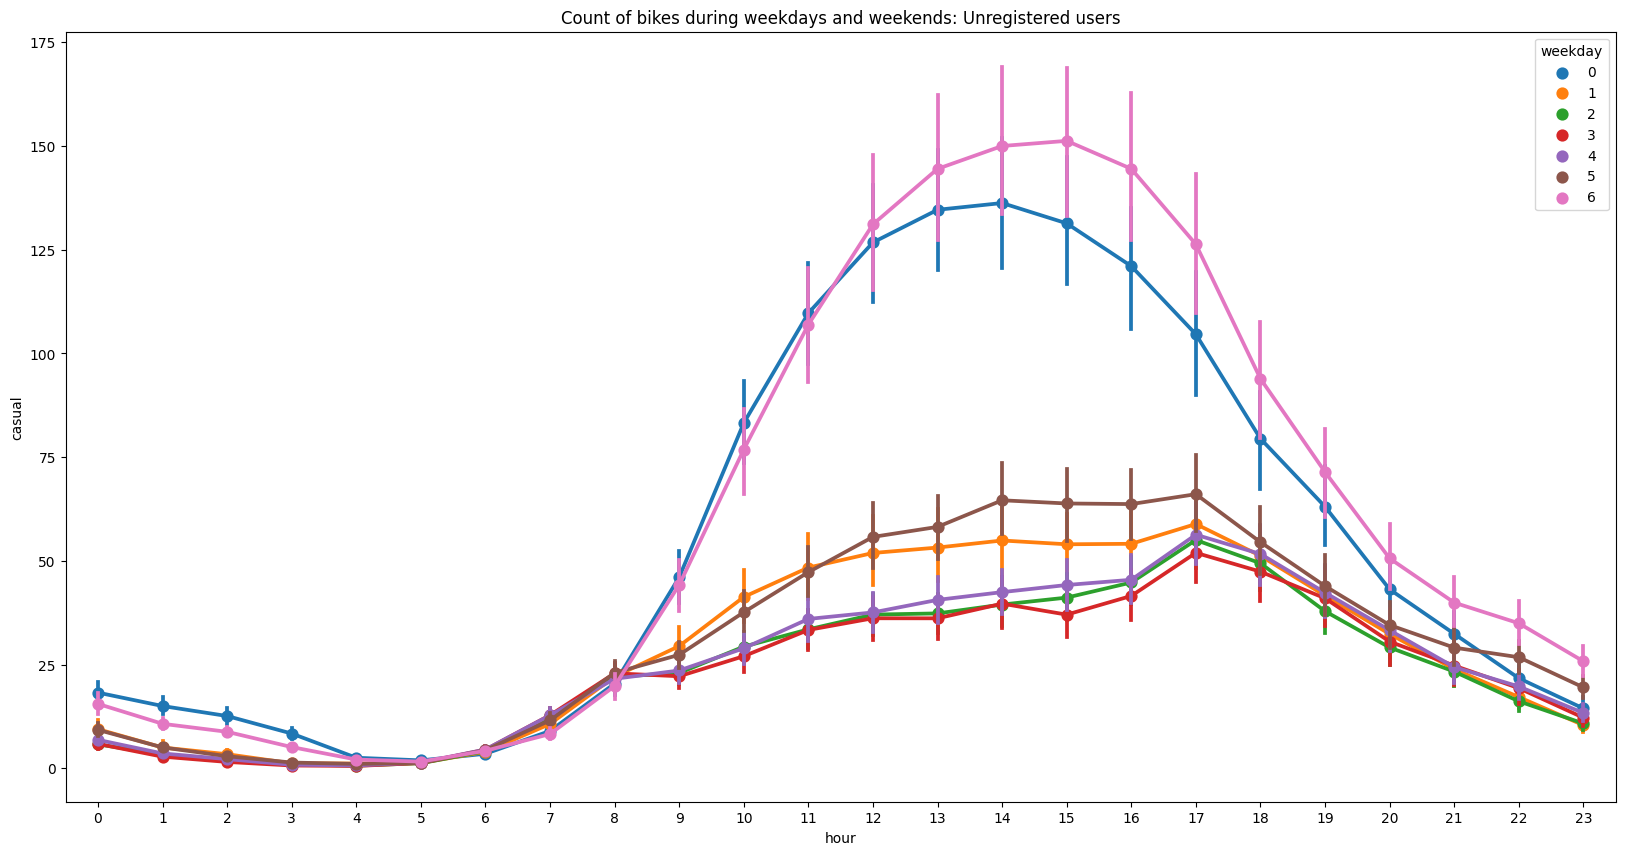

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='casual', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Unregistered users')

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: Registered users')]

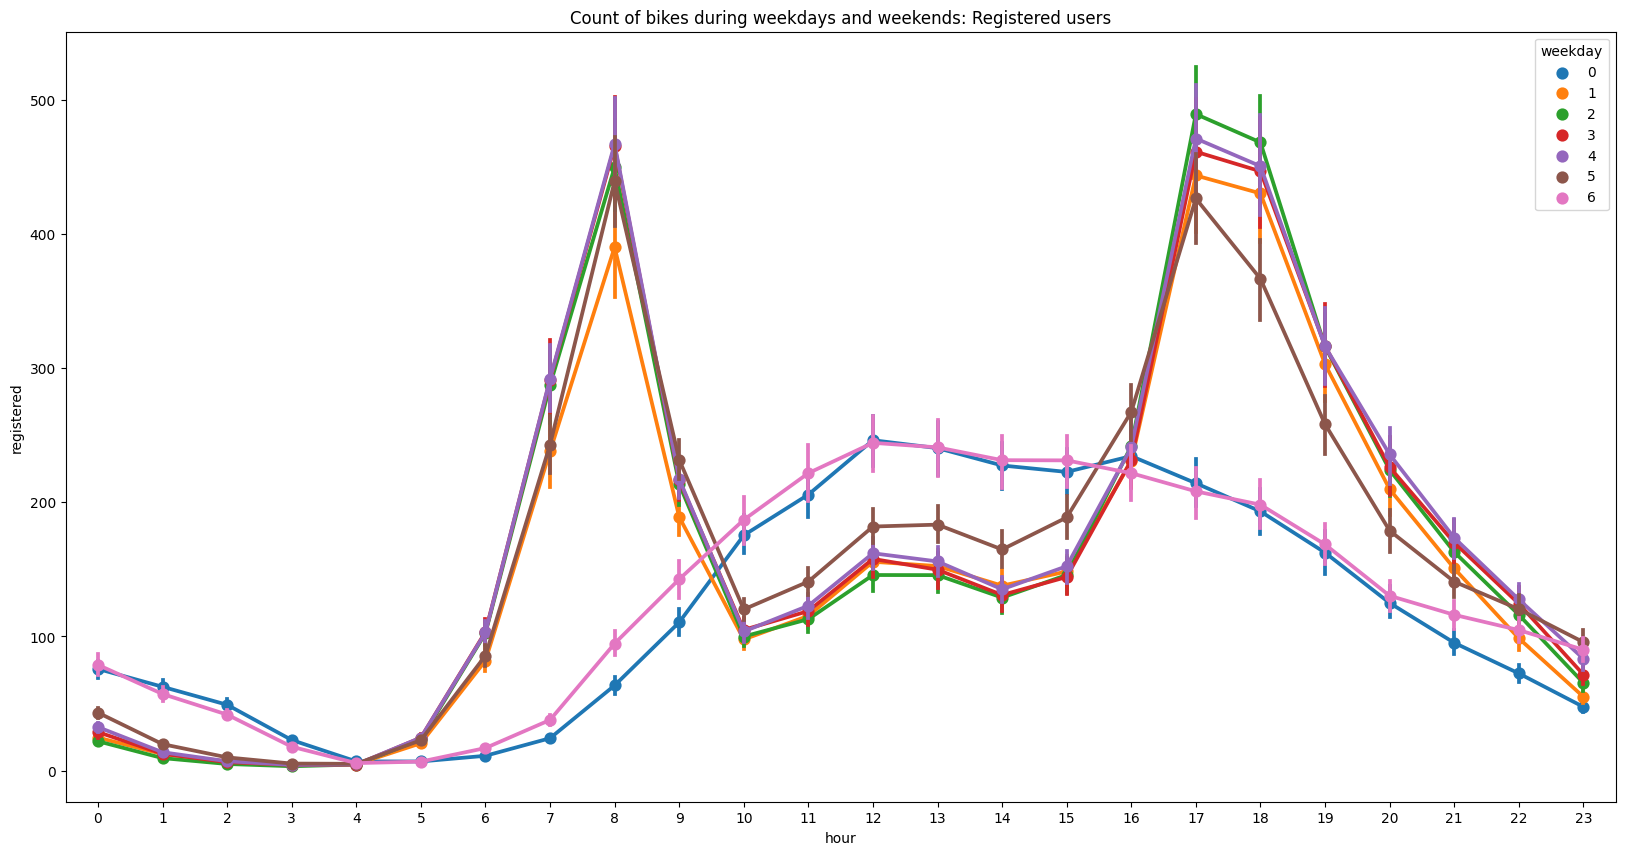

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='registered', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: Registered users')

[Text(0.5, 1.0, 'Count of bikes during different weathers')]

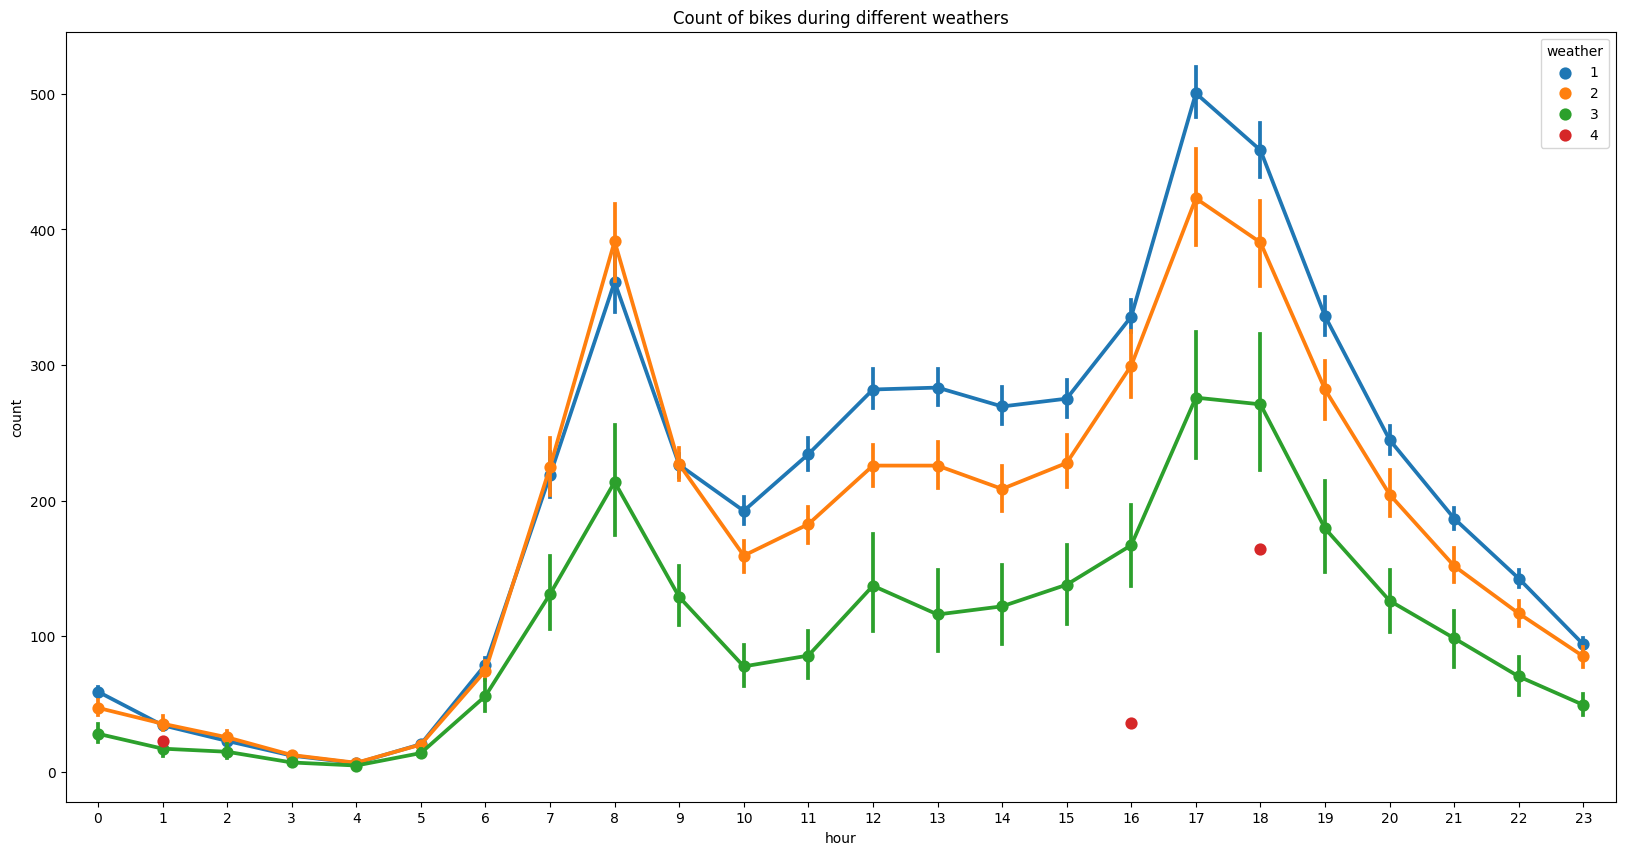

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count', hue='weather', ax=ax)
ax.set(title='Count of bikes during different weathers')

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

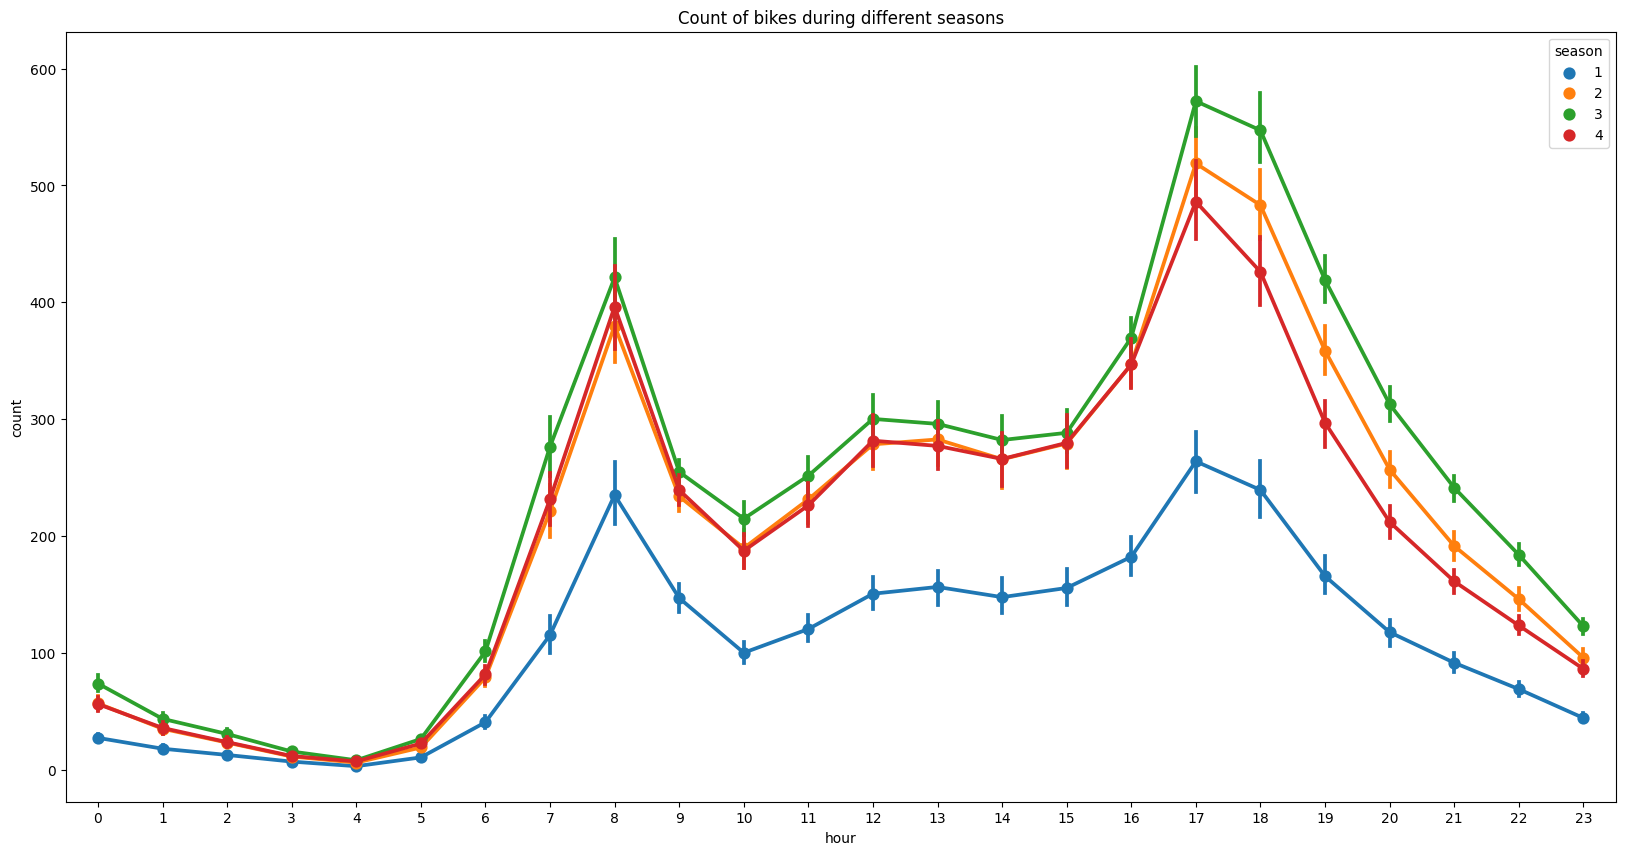

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df, x='hour', y='count', hue='season', ax=ax)
ax.set(title='Count of bikes during different seasons')

[Text(0.5, 1.0, 'Count of bikes during different months')]

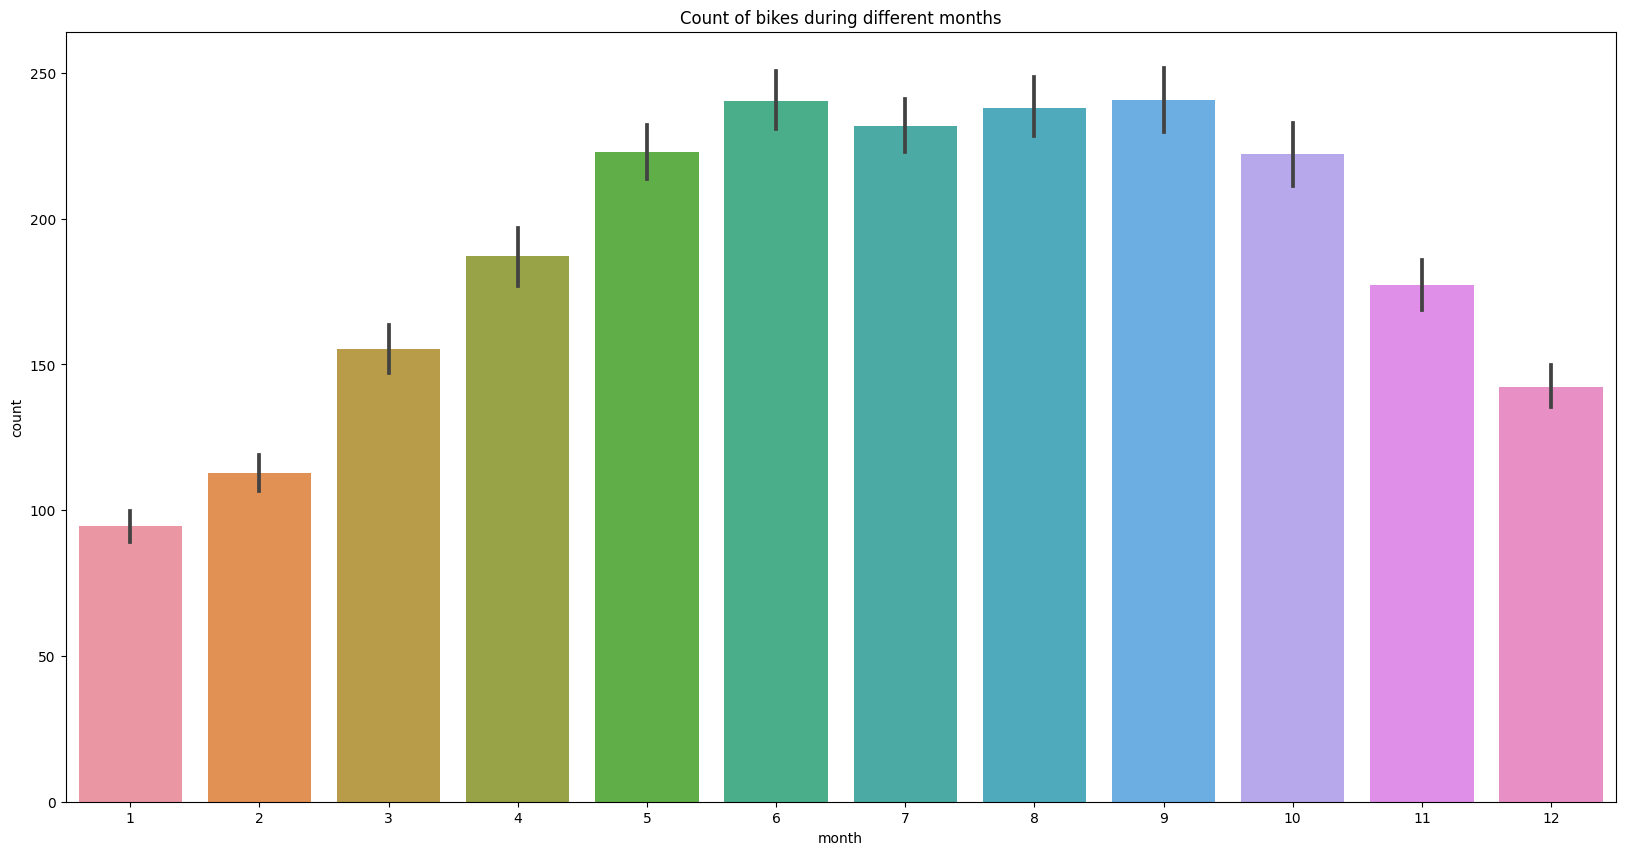

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='month', y='count', ax=ax)
ax.set(title='Count of bikes during different months')

[Text(0.5, 1.0, 'Count of bikes during different days')]

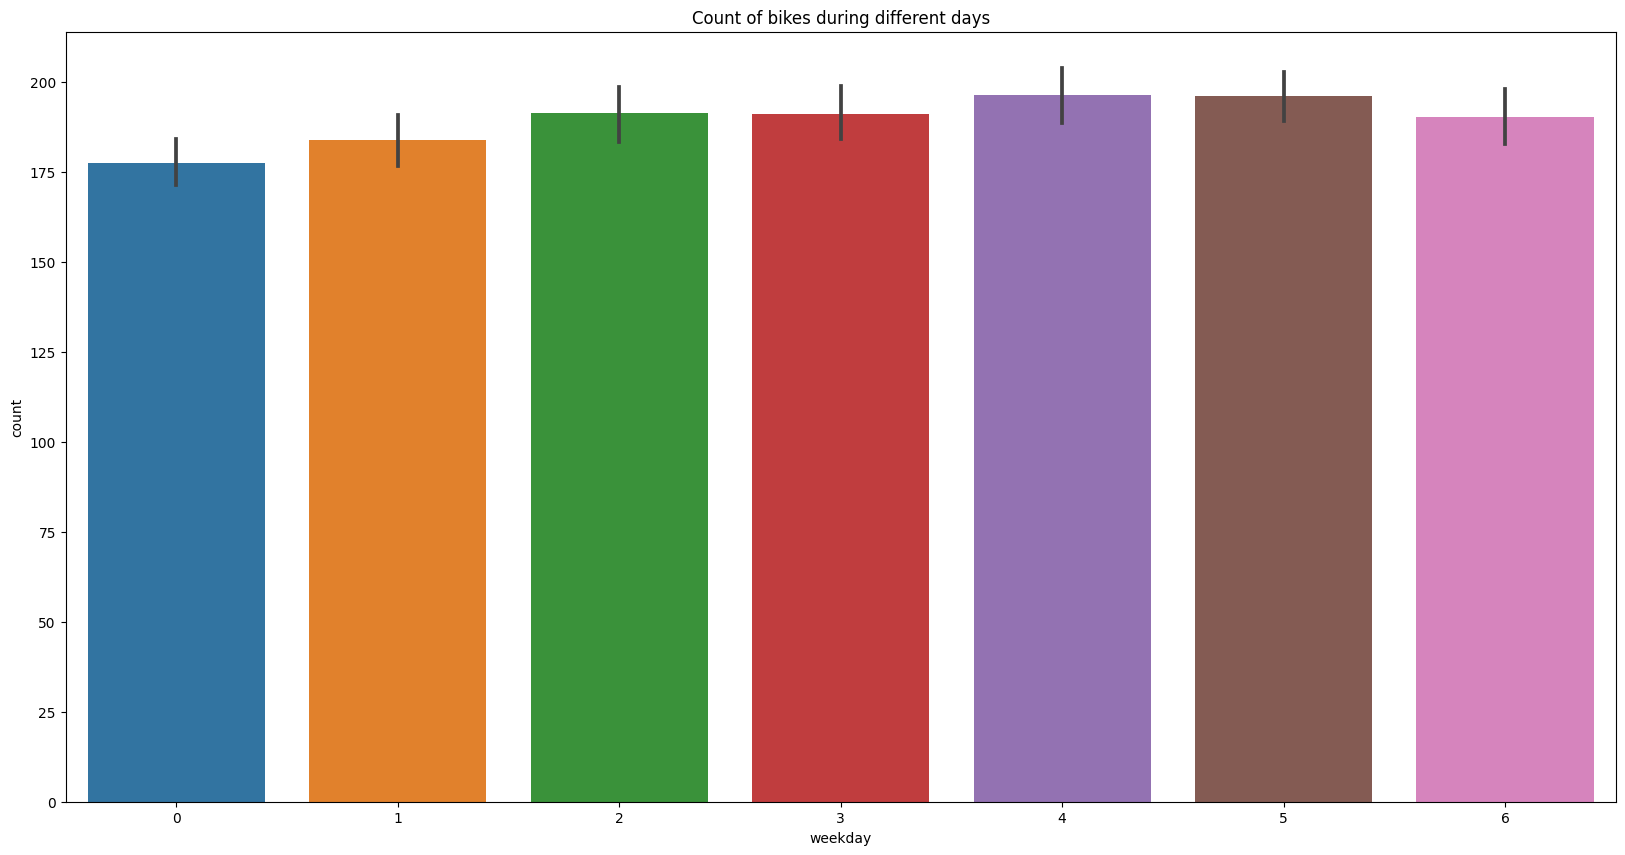

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='weekday', y='count', ax=ax)
ax.set(title='Count of bikes during different days')

[Text(0.5, 1.0, 'Relation between humidity and users')]

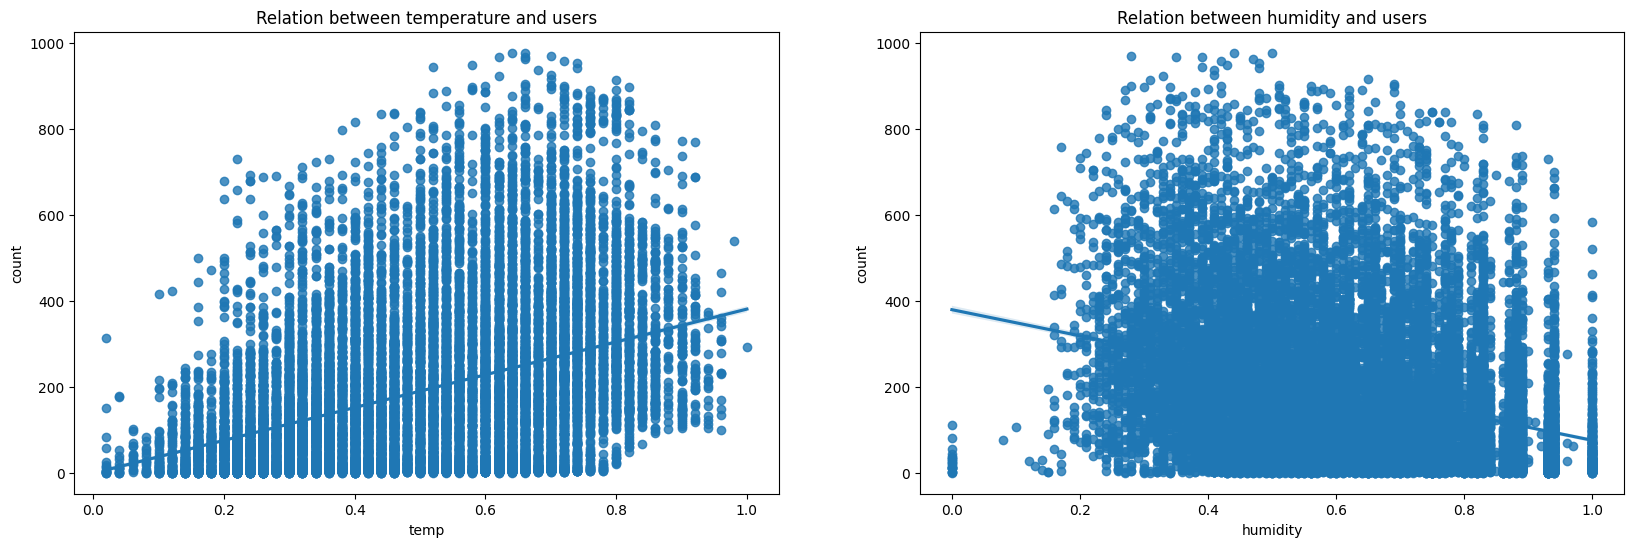

In [17]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=df['temp'], y=df['count'], ax=ax1)
ax1.set(title="Relation between temperature and users")
sns.regplot(x=df['humidity'], y=df['count'], ax=ax2)
ax2.set(title="Relation between humidity and users")

[Text(0.5, 1.0, 'Theoritical quantiles')]

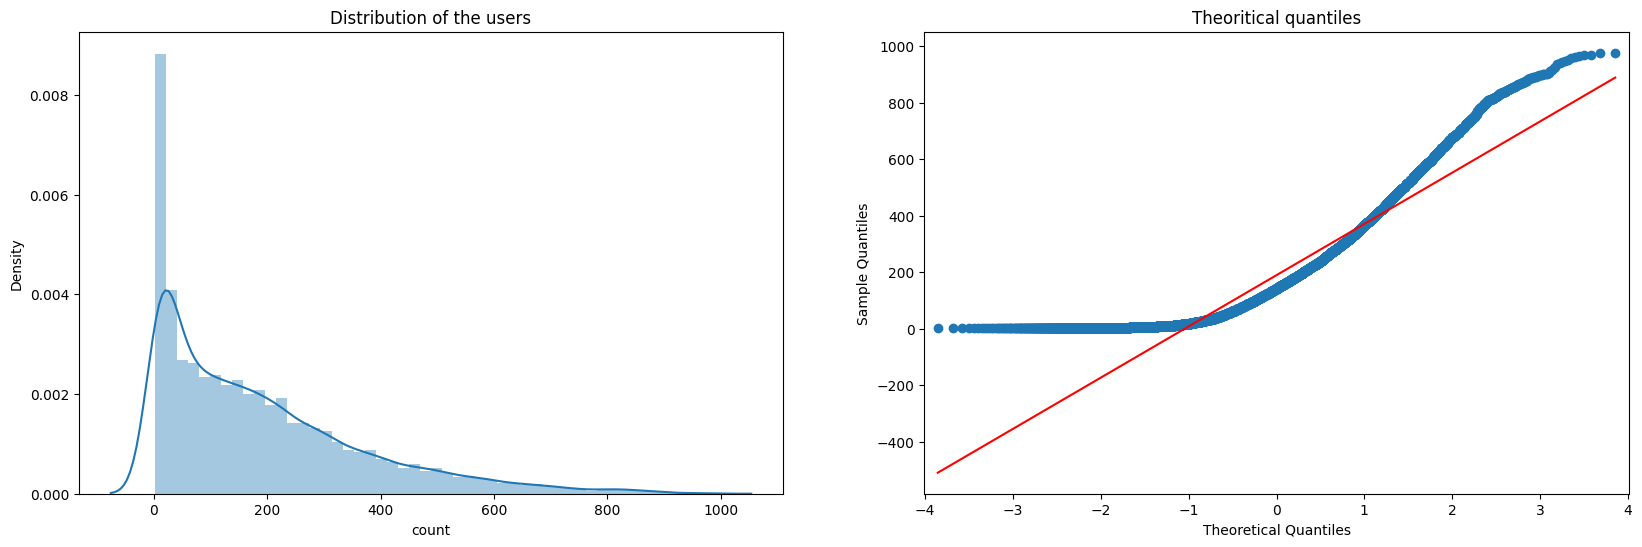

In [18]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df['count'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df['count'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

In [19]:
df['count'] = np.log(df['count'])

[Text(0.5, 1.0, 'Theoritical quantiles')]

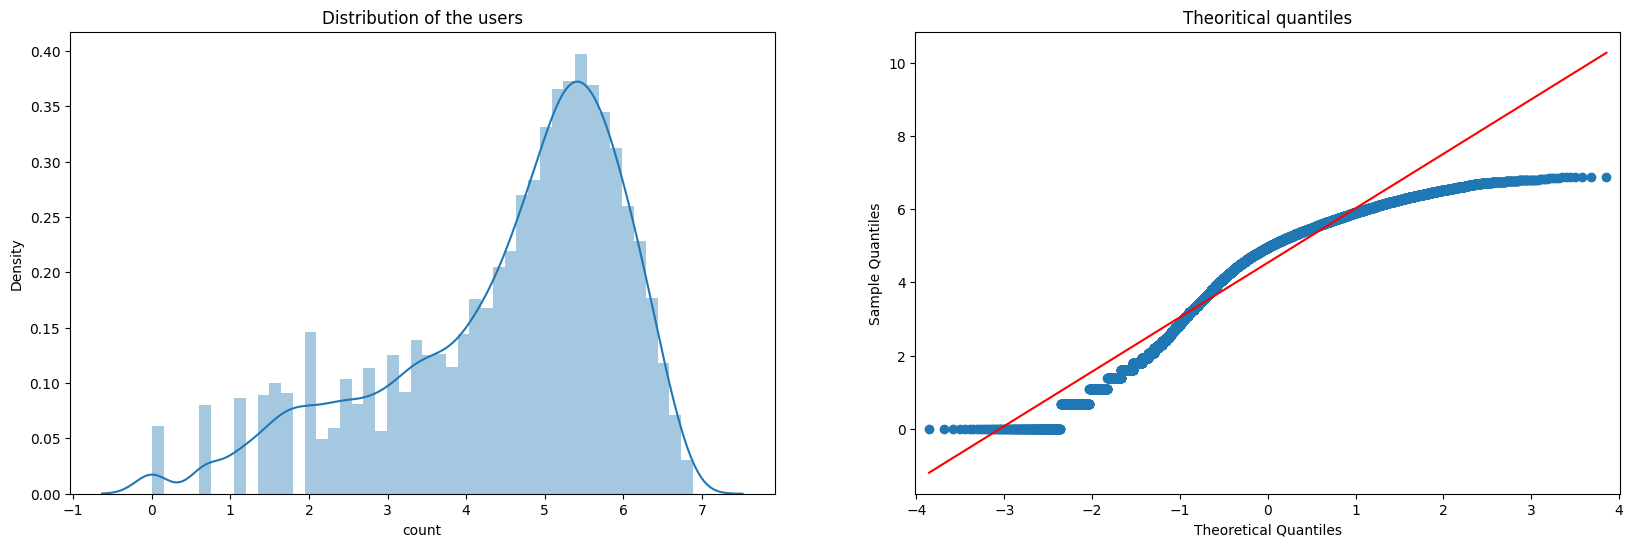

In [20]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df['count'], ax=ax1)
ax1.set(title='Distribution of the users')
qqplot(df['count'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

## Coorelation Matrix



<AxesSubplot: >

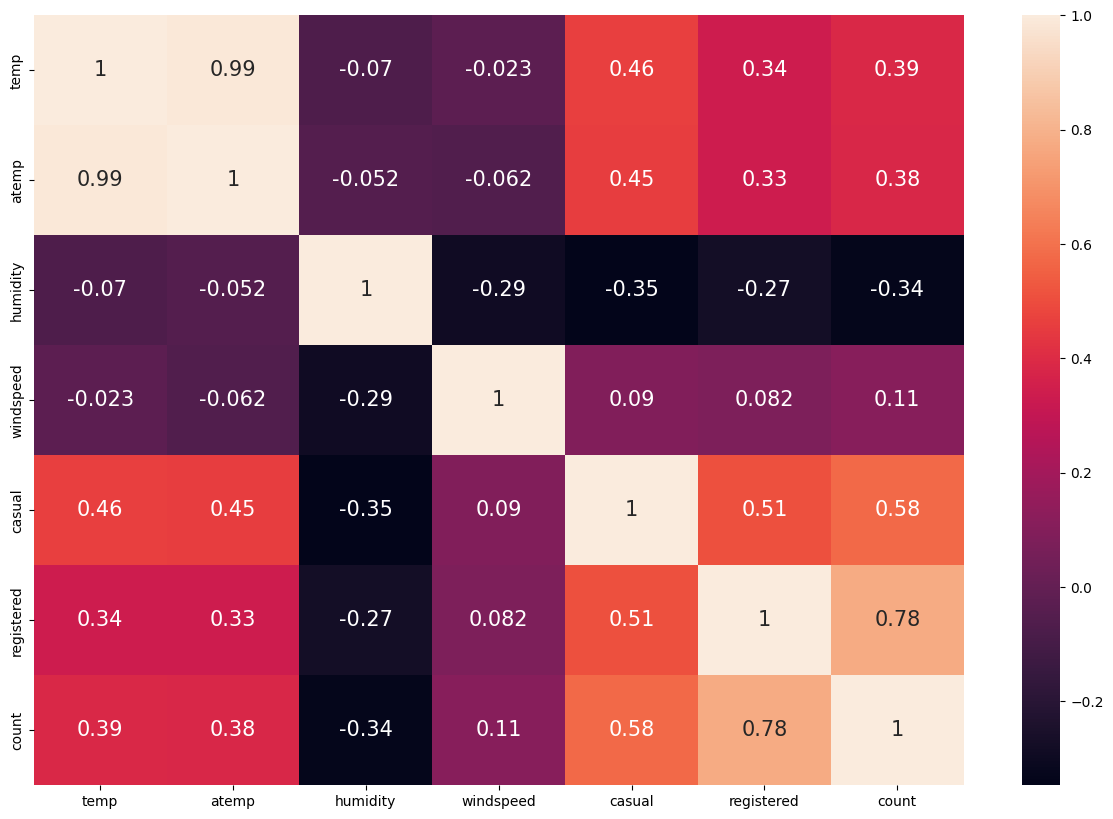

In [21]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

## One hot Encoding

In [22]:
pd.get_dummies(df['season'], prefix='season', drop_first=True)

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
17374,0,0,0
17375,0,0,0
17376,0,0,0
17377,0,0,0


In [23]:
df_oh = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['season','month','hour','holiday','weekday','workingday','weather']

for col in cols:
    df_oh = one_hot_encoding(df_oh, col)
df_oh.head()

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.2879,0.81,0.0,3,13,2.772589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.22,0.2727,0.80,0.0,8,32,3.688879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.22,0.2727,0.80,0.0,5,27,3.465736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.24,0.2879,0.75,0.0,3,10,2.564949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.24,0.2879,0.75,0.0,0,1,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Input Split

In [24]:
X = df_oh.drop(columns=['atemp', 'windspeed', 'casual', 'registered', 'count'], axis=1)
y = df_oh['count']

## Model Training

In [25]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

models = [LinearRegression(),
         Ridge(),
         HuberRegressor(),
         ElasticNetCV(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         ExtraTreesRegressor(),
         GradientBoostingRegressor()]

In [28]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=5, random_state=42, shuffle=True)
    pred = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [29]:
for model in models:
    train(model)

Model: LinearRegression()
CV score: 0.4496482311519661
Model: Ridge()
CV score: 0.4484090089563207
Model: HuberRegressor()
CV score: 0.4659680491830451
Model: ElasticNetCV()
CV score: 0.4561491813535915
Model: DecisionTreeRegressor()
CV score: 0.44127675529286625
Model: RandomForestRegressor()
CV score: 0.2334553840388415
Model: ExtraTreesRegressor()
CV score: 0.23443899842911006
Model: GradientBoostingRegressor()
CV score: 0.3569921961655795


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

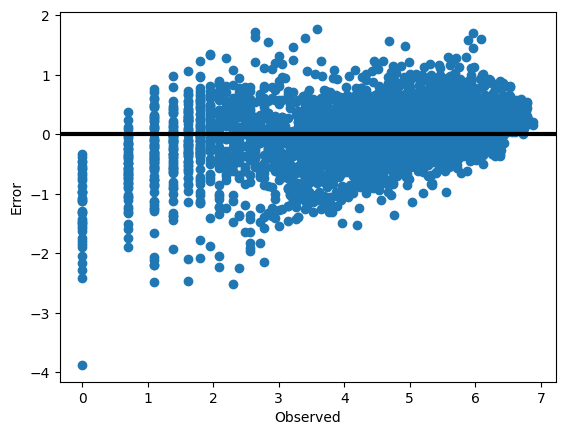

In [32]:
# plot the error difference
error = y_test - y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.4843585060504339